<h2>Import Libraries</h2>

In [1]:
library(randomForest)
library(dplyr)
library(caret)
library(e1071)
library(MLmetrics)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin


Attaching package: ‘MLmetrics’

The following objects are masked from ‘package:caret’:

    MAE, RMSE

The following object is masked from ‘package:base’:

    Recall



<h2>Load CSV File</h2>

In [2]:
data <- read.csv("e1 positive.csv")

<h2>Check Data</h2>

In [4]:
# Check rows
rows <- nrow(data)  
rows

[1] 871

In [5]:
# Check columns
ncol(data)  

[1] 609

In [6]:
# Check number of positive classes
positive <- length(data$Label[data$Label == 1])  
positive

[1] 299

In [7]:
# Check number of negative classes
negative <- length(data$Label[data$Label == 0])  
negative

[1] 572

In [8]:
# Check if data is balanced
positive / rows  

[1] 0.3432836

<h2>Split Data Train/Test</h2>

In [99]:
# Set the starting point for the random number generator
# Generates the same random result each time
set.seed(1)

# Randomly split data with 75% in train set and 25% in test set
sample <- sample.int(n = nrow(data), size = floor(.75*nrow(data)), replace = F)
train <- data[sample, ]
test  <- data[-sample, ]

<h2>Check Split Data</h2>

<strong>Check Train</strong>

In [101]:
head(train)

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
836,31.16355,364.915074,216.13427,0.000000,161.849386,56.29544,75.39568,0,0.000000,132.696391,...,0,0,0,0.000000,0.000000,0.000000,2.010551,0,0,0
679,1390.80374,1.009292,125.15215,0.000000,48.445994,11.10221,75.69687,0,0.000000,1.009292,...,0,0,0,1.009292,0.000000,1.009292,2.018583,0,0,0
129,241.31056,44.240269,15.08191,115.627976,7.038225,243.32148,350.90577,0,1.005461,0.000000,...,0,0,0,0.000000,0.000000,0.000000,1.005461,0,0,1
509,115.87592,156.534131,173.81387,0.000000,569.215022,632.23526,221.58728,0,120.958192,101.645540,...,0,0,0,0.000000,0.000000,1.016455,0.000000,0,0,0
471,353.66824,296.756110,467.49250,3.048864,218.501930,102.64509,5.08144,0,0.000000,155.492071,...,0,0,0,0.000000,1.016288,0.000000,33.537506,0,0,0
299,236.13463,157.758027,234.12497,0.000000,4.019313,69.33315,24.11588,0,0.000000,1.004828,...,0,0,0,0.000000,0.000000,0.000000,0.000000,0,0,1


In [100]:
# Check positive classes in train set
posTrain <- length(train$Label[train$Label == 1])
posTrain

[1] 221

In [102]:
# Check negative classes in train set
negTrain <- length(train$Label[train$Label == 0])
negTrain

[1] 432

In [103]:
# Check train set is balanced
posTrain / nrow(train)

[1] 0.338438

<strong>Check Test</strong>

In [104]:
head(test)

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
9,630.29364,9.032871,80.29218,0.000000,22.080350,107.390795,85.31044,0,0,1.003652,...,0,0,0,0,0,1.003652,0.000000,0,0,1
10,665.87696,61.080443,302.39826,2.002637,14.018462,5.006594,12.01582,0,0,50.065937,...,0,0,0,0,0,0.000000,1.001319,0,0,1
14,586.73060,69.680570,21.20713,0.000000,101.996197,143.400594,310.02804,0,0,75.739750,...,0,0,0,0,0,0.000000,1.009863,0,0,1
18,22.02319,97.102249,348.36683,0.000000,8.008433,230.242445,305.32150,0,0,0.000000,...,0,0,0,0,0,0.000000,3.003162,0,0,1
21,111.97835,383.349323,168.47194,0.000000,9.079326,165.445497,446.90461,0,0,65.572911,...,0,0,0,0,0,0.000000,0.000000,0,0,1
23,126.61484,416.020194,170.82955,0.000000,8.039038,194.946661,345.67862,0,0,1.004880,...,0,0,0,0,0,1.004880,1.004880,0,0,1


In [105]:
# Check positive classes in test set
posTest <- length(test$Label[test$Label == 1])
posTest

[1] 78

In [106]:
# Check negative classes in test set
negTest <- length(test$Label[test$Label == 0])
negTest

[1] 140

In [107]:
# Check if test set is balanced
posTest / nrow(test)

[1] 0.3577982

<h2>Train Models</h2>

In [19]:
# ntree = Number of trees - default 500
# mtry = Number of max features
# cutoff = c(k,1-k), k is cutoff value

In [7]:
set.seed(1)

# Model done without splitting data
model <- randomForest(factor(Label) ~ ., 
           data = data, ntree=1000, mtry=50, cutoff=c(0.7,1-0.7), importance=TRUE)
model


Call:
 randomForest(formula = factor(Label) ~ ., data = data, ntree = 1000,      mtry = 50, cutoff = c(0.7, 1 - 0.7), importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 50

        OOB estimate of  error rate: 0.69%
Confusion matrix:
    0   1 class.error
0 566   6  0.01048951
1   0 299  0.00000000

In [216]:
# Model done on train set 
modelSplit <- randomForest(factor(Label) ~ ., 
           data = train, ntree=500, mtry=12, cutoff=c(0.5,1-0.5), importance=TRUE)
modelSplit


Call:
 randomForest(formula = factor(Label) ~ ., data = train, ntree = 500,      mtry = 12, cutoff = c(0.5, 1 - 0.5), importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 0.46%
Confusion matrix:
    0   1 class.error
0 429   3 0.006944444
1   0 221 0.000000000

<h2>Plot Models</h2>

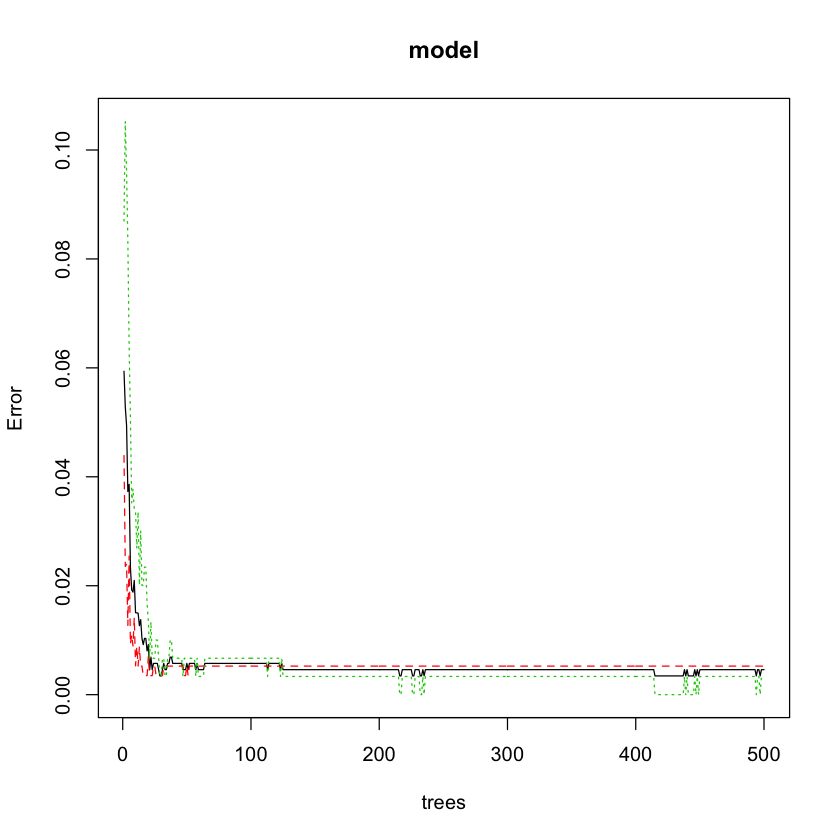

In [217]:
plot(model)

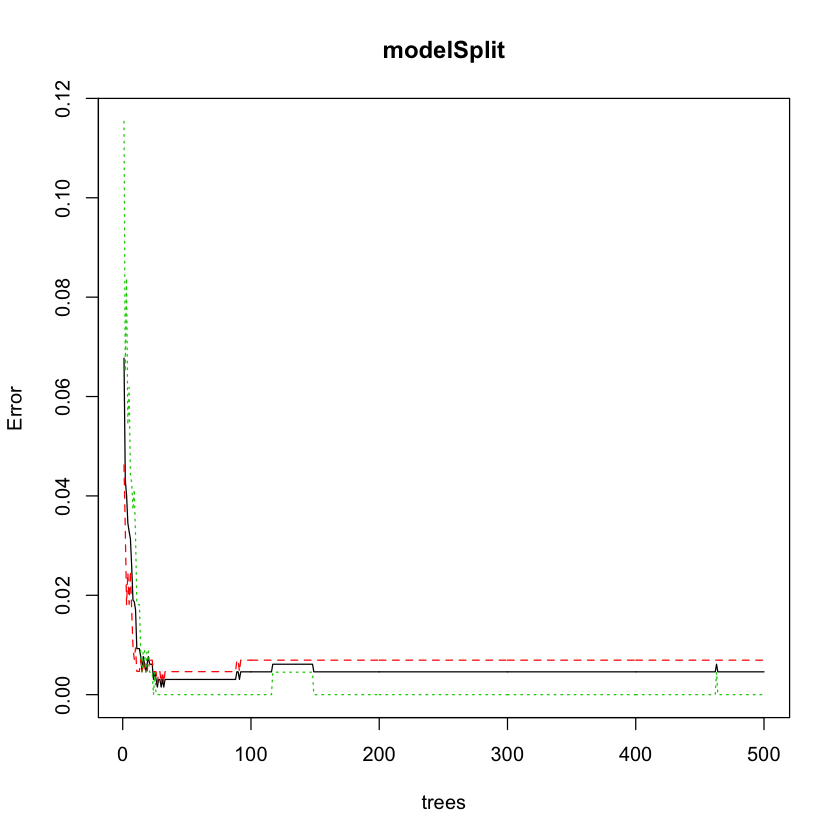

In [218]:
plot(modelSplit)

<h2>Variable Importance</h2>

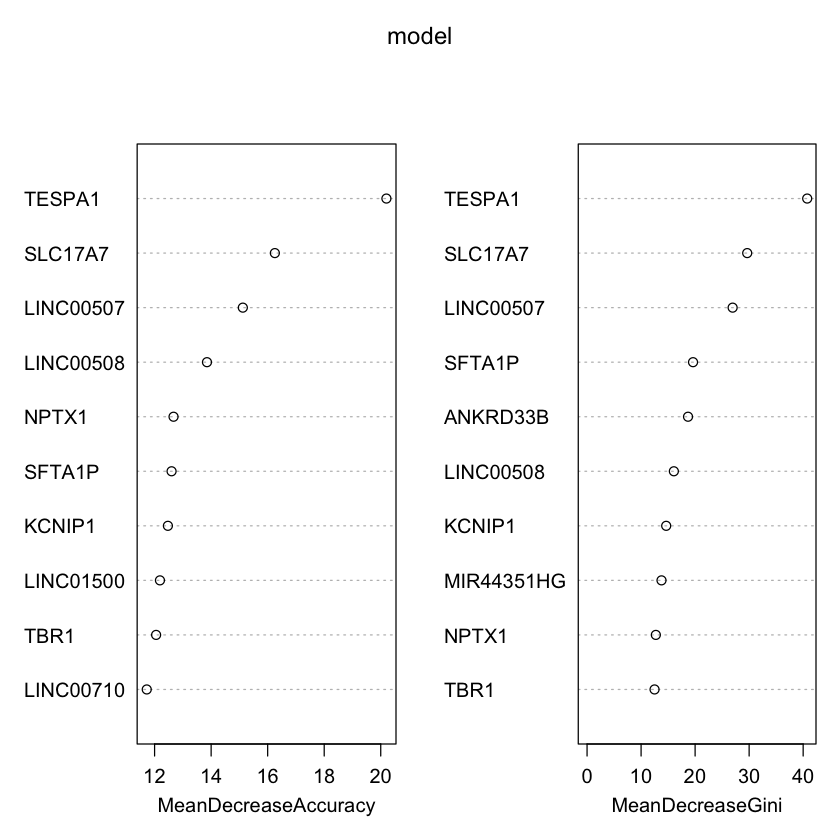

In [8]:
varImpPlot(model, n.var=10)

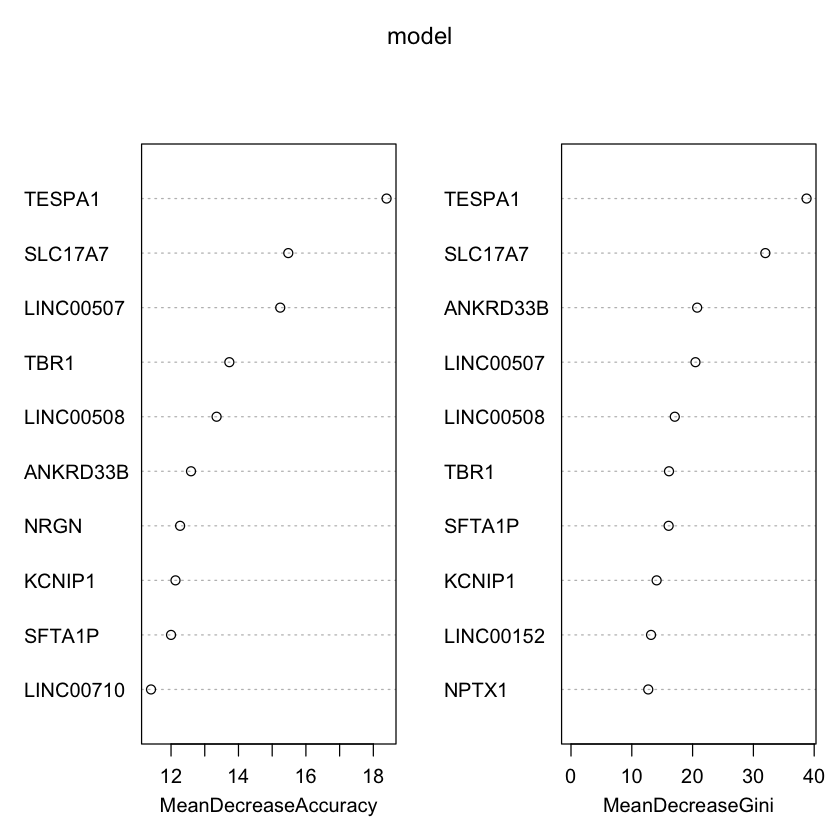

In [18]:
varImpPlot(model, n.var=10)

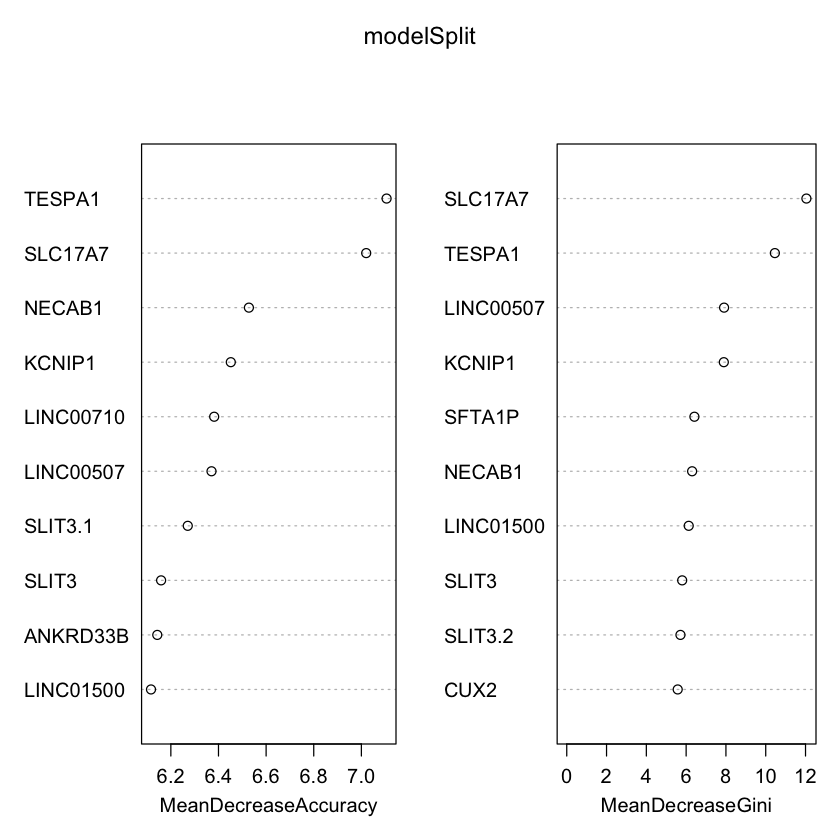

In [232]:
varImpPlot(modelSplit, n.var=10)

<h2>Prediction</h2>

In [237]:
# Prediciton run with model on entire data
prediction <-predict(model, data)
head(prediction)

1 2 3 4 5 6 
1 1 1 1 1 1 
Levels: 0 1

In [238]:
# Prediction run with modelSplit on test set
predictionSplit <-predict(modelSplit, test)
head(predictionSplit)

9 10 14 18 21 23 
 1  1  1  1  1  1 
Levels: 0 1

<h2>Confusion Matrix</h2>

In [239]:
# Confusion matrix for model preduction on entire data set
confusionMatrix(factor(data$Label), prediction, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 572   0
         1   0 299
                                     
               Accuracy : 1          
                 95% CI : (0.9958, 1)
    No Information Rate : 0.6567     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.3433     
         Detection Rate : 0.3433     
   Detection Prevalence : 0.3433     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 1          
                                     

In [240]:
# Confusion Matrix for modelSplit prediction on test set
confusionMatrix(factor(test$Label), predictionSplit, positive='1')

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 140   0
         1   0  78
                                     
               Accuracy : 1          
                 95% CI : (0.9832, 1)
    No Information Rate : 0.6422     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.3578     
         Detection Rate : 0.3578     
   Detection Prevalence : 0.3578     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 1          
                                     

<h2>F1 Score</h2>

In [241]:
# F1 Score for model run with entire data set
F1_Score(factor(data$Label), prediction, positive='1') 

[1] 1

In [242]:
# F1 Score for modelSplit run with test set 
F1_Score(factor(test$Label), predictionSplit, positive='1') 

[1] 1

<h2>Runtime Tests</h2>

In [227]:
# Random row with positive label
runtime1 <- data[3,]
runtime1

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
3,220.1439,187.9767,42.21937,106.5537,0,187.9767,299.5565,0,0,0,...,0,0,0,0,0,7.036562,0,0,0,1


In [228]:
predict(model, runtime1)

3 
1 
Levels: 0 1

In [229]:
# Random row with negative label
runtime2 <- data[343,]
runtime2

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
343,2.025304,3.037956,3.037956,78.98686,2.025304,5.06326,5.06326,310.8842,18.22774,0,...,2.025304,0,0,0,2.025304,2.025304,0,0,3.037956,0


In [230]:
predict(model, runtime2)

343 
  0 
Levels: 0 1

In [243]:
predict(modelSplit, runtime1)

3 
1 
Levels: 0 1

In [244]:
predict(modelSplit, runtime2)

343 
  0 
Levels: 0 1